In [1]:
#import librairies

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import style

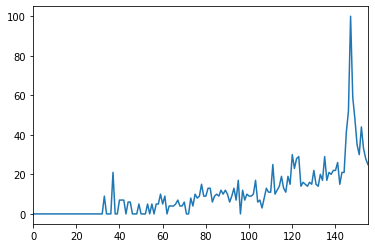

In [10]:
df_GT = pd.read_csv("/Users/guillaume/Downloads/multiTimeline.csv")
df_GT.columns
#plt.plot(df_GT['Mois'],df_GT['vanguard voo etf: (États-Unis)'])
df_GT['vanguard voo etf: (États-Unis)'].plot()

In [11]:
df_GT

,Mois,vanguard voo etf: (États-Unis)
0,2007-12,0
1,2008-01,0
2,2008-02,0
3,2008-03,0
4,2008-04,0
...,...,...
151,2020-07,30
152,2020-08,44
153,2020-09,33
154,2020-10,28


In [32]:
df = pd.read_excel("Data/contituents_S&P_ETF_weight.xls","S&P")
df

,Feb-27-2004 Shares Held,Apr-30-2004 Shares Held,Sep-30-2004 Shares Held,Dec-31-2004 Shares Held,Jan-31-2005 Shares Held,Feb-28-2005 Shares Held,Mar-31-2005 Shares Held,Jun-30-2005 Shares Held,Sep-30-2005 Shares Held,Dec-31-2005 Shares Held,...,Feb-28-2020 Shares Held,Mar-31-2020 Shares Held,Apr-30-2020 Shares Held,May-29-2020 Shares Held,Jun-30-2020 Shares Held,Jul-31-2020 Shares Held,Aug-31-2020 Shares Held,Sep-30-2020 Shares Held,Oct-30-2020 Shares Held,Latest Shares Held
0,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,...,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.
1,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,...,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company
2,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,...,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation
3,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,...,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation
4,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,...,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Capri Holdings Limited,Capri Holdings Limited,Capri Holdings Limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
database ={}
for i in range(len(df.columns)):
    stock=[]
    for value in df[df.columns[i]]:
        if pd.isnull(value) == False:
            stock.append(value)
    result = re.search("[^\s]+", df.columns[i])
    database[result.group()] = stock
#database

In [61]:
df_database = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in database.items() ]))
df_database = df_database.iloc[:,:len(df_database.columns)-1]
df_database

,Feb-27-2004,Apr-30-2004,Sep-30-2004,Dec-31-2004,Jan-31-2005,Feb-28-2005,Mar-31-2005,Jun-30-2005,Sep-30-2005,Dec-31-2005,...,Jan-31-2020,Feb-28-2020,Mar-31-2020,Apr-30-2020,May-29-2020,Jun-30-2020,Jul-31-2020,Aug-31-2020,Sep-30-2020,Oct-30-2020
0,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,...,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.,Apple Inc.
1,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,...,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company,General Electric Company
2,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,...,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation,Bank of America Corporation
3,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,...,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation,Microsoft Corporation
4,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,...,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.,AT&T Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,NaN,NaN,NaN,NaN,NaN,NaN,Navient Corporation,NaN,NaN,NaN,...,"Harley-Davidson, Inc.","Harley-Davidson, Inc.",Raytheon Company,"Nordstrom, Inc.","Noble Energy, Inc.","E*TRADE Financial, LLC","E*TRADE Financial, LLC","E*TRADE Financial, LLC","AutoZone, Inc.","Chipotle Mexican Grill, Inc."
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Helmerich & Payne, Inc.","Helmerich & Payne, Inc.","Harley-Davidson, Inc.",Allergan plc,Coty Inc.,Kohl's Corporation,Kohl's Corporation,Kohl's Corporation,"Bio-Rad Laboratories, Inc.",Mettler-Toledo International Inc.
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Macy's, Inc.","Macy's, Inc.","Helmerich & Payne, Inc.","Harley-Davidson, Inc.",Alliance Data Systems Corporation,"H&R Block, Inc.","H&R Block, Inc.","H&R Block, Inc.","NVR, Inc.","AutoZone, Inc."
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Cimarex Energy Co.,Cimarex Energy Co.,"Macy's, Inc.","Helmerich & Payne, Inc.","Nordstrom, Inc.","Noble Energy, Inc.","Noble Energy, Inc.","Noble Energy, Inc.","E*TRADE Financial, LLC","Bio-Rad Laboratories, Inc."


In [30]:
df_database.to_excel('Data/S&PCompanies.xlsx', engine='xlsxwriter')

In [21]:
df_changeSP = pd.read_excel("Data/SPchangeWiki.xlsx")
df_changeSP

,Unnamed: 0,Date,Added,Unnamed: 3,Removed,Unnamed: 5,Reason
0,NaN,Date,Ticker,Security,Ticker,Security,Reason
1,0.0,"October 12, 2020",NaN,NaN,NBL,Noble Energy,Chevron acquired Noble Energy.[6]
2,1.0,"October 9, 2020",VNT,Vontier,NaN,NaN,S&P 500 constituent Fortive spun off Vontier.[6]
3,2.0,"October 7, 2020",POOL,Pool Corporation,ETFC,E*TRADE Financial,Morgan Stanley acquired E*TRADE.[7]
4,3.0,"September 21, 2020",ETSY,Etsy,HRB,H&R Block,Market capitalization change.[8]
...,...,...,...,...,...,...,...
255,254.0,"December 5, 2000",SBL,Symbol Technologies,OI,Owens-Illinois,Market Cap changes.
256,255.0,"December 5, 2000",AYE,Allegheny Energy,GRA,W.R. Grace,Market Cap changes.
257,256.0,"December 5, 2000",ABK,Ambac Financial,CCK,Crown Holdings,Market Cap changes.
258,257.0,"July 27, 2000",JDSU,JDS Uniphase,RAD,RiteAid,Market Cap change.[206]


In [7]:
tickers = []
dates = []
for i in range(len(df_changeSP['Date'].values)):
    if pd.notna(df_changeSP['Ticker Symbol'].values[i]):
        dates.append(df_changeSP['Date'].values[i])
        tickers.append(df_changeSP['Ticker Symbol'].values[i])
        #print(df_changeSP['Date'].values[i])
        #print(df_changeSP['Ticker Symbol'].values[i])
print(len(dates))
print(len(tickers))

118
118


In [14]:
stocks = []
entree = []
sortie = []

for i in range(len(df_changeSP['Ticker Symbol'].values)):
    if pd.notna(df_changeSP['Ticker Symbol'].values[i]):
        for j in range(len(df_changeSP['Ticker Symbol.1'].values)):
            if df_changeSP['Ticker Symbol.1'].values[j] == df_changeSP['Ticker Symbol'].values[i]:
                stocks.append(df_changeSP['Ticker Symbol.1'].values[j])
                sortie.append(df_changeSP['Date'].values[j])
                entree.append(df_changeSP['Date'].values[i])

In [19]:
changeFlow = pd.DataFrame(stocks,columns=['stocks'])
changeFlow

,stocks
0,FCPT
1,PETM
2,FOSL
3,WPX
4,GAS
5,CBE
6,CBE
7,CBE
8,CBE
9,ANR


In [20]:
changeFlow['entree'] = entree
changeFlow['sortie'] = sortie
changeFlow

,stocks,entree,sortie
0,FCPT,10-Nov-15,11-Nov-15
1,PETM,10-Oct-12,12-Mar-15
2,FOSL,3-Apr-12,5-Jan-16
3,WPX,31-Dec-11,21-Mar-14
4,GAS,12-Dec-11,12-Dec-11
5,CBE,18-Nov-11,3-Dec-12
6,CBE,18-Nov-11,28-Sep-09
7,CBE,18-Nov-11,3-Dec-12
8,CBE,18-Nov-11,28-Sep-09
9,ANR,1-Jun-11,2-Oct-12
